In [ ]:
from astropy.table import Table
from astropy.io import fits
file = Datadir + '/catalog_for_andrea.txt'
obs = Table.read(file, format='ascii') 

mass_with_err=obs['stellarmass']+ np.random.randn(len(obs['stellarmass']))*0.08*(1+obs['z_geo'])

fa = open(Datadir+'/new_catalog_for_andrea.txt', "w")

for kk in range (0,len(obs['stellarmass'])): 
    fa.write("%0.2f " % obs['stellarmass'][kk] + "%0.2f " % mass_with_err[kk] + 
            "%0.2f " % obs['SFR'][kk] + "%0.2f " % obs['rbandWeightedAge'][kk] + 
             "%0.2f " % obs['massWeightedAge'][kk] + "%0.2f " % obs['z_geo'][kk] +
            "%0.2f\n" % obs['z_app'][kk])         
fa.close()

In [ ]:
from astropy.table import Table
from astropy.io import fits

with PdfPages('./fig/plots.pdf') as pdf:  

    xlim=[10.0,12.5]
    ylim=[-13.0, -7.0]
     
    fig = plt.figure(figsize=(one_one_size_small[0],one_one_size_small[1]))
    subplot=plt.subplot()
    subplot.set_ylim(ylim), subplot.set_xlim(xlim)    
        
    xlab='$\mathrm{log_{10}}(M_{*}[M_{\odot}])$'       
    ylab='$\mathrm{SSFR}$' 
    subplot.set_xlabel(xlab, fontsize=14), subplot.set_ylabel(ylab, fontsize=14)   

    for ii in range (1,25):
        print("doing file",ii)
        if(ii<10):
            file = Datadir + '/catalog_for_andrea_0'+str(ii)+'.txt'
        else:
            file = Datadir + '/catalog_for_andrea_'+str(ii)+'.txt'
        obs = Table.read(file, format='ascii') 
        
        x_rand=np.random.randn(len(obs['stellarmass']))
        x2_rand=np.random.randn(len(obs['stellarmass']))
        #mass_with_err=obs['stellarmass']+ x_rand *0.04*(1+obs['z_geo'])-np.log10(Hubble_h)
        #SFR=10**(np.log10(obs['SFR'])+ x2_rand *0.04*(1+obs['z_geo']))        
        mass_with_err=obs['stellarmass']-np.log10(Hubble_h) 
        SFR=obs['SFR']
        
        sel=(mass_with_err>11.0) & (obs['SFR']<10)
        sel=(mass_with_err>11.0) & (SFR<10)
        #print(mass_with_err[sel])
        #print(obs['SFR'][sel])

        #if(ii==1):
        #    plt.scatter(mass_with_err, np.log10(obs['SFR']/10**mass_with_err), s=5, color='black') 
        #plt.scatter(mass_with_err[sel], np.log10(obs['SFR'][sel]/10**mass_with_err[sel]), s=5, color='red') 
        
        if(ii==1):
            plt.scatter(mass_with_err, np.log10(SFR/10**mass_with_err), s=5, color='black') 
        plt.scatter(mass_with_err[sel], np.log10(SFR[sel]/10**mass_with_err[sel]), s=5, color='red') 

    print("plots done")
    plt.tight_layout()   
    pdf.savefig()
    plt.close()


In [63]:
#IDs for the sample of galaxies with z>3 and log10(SSFR) < -11
GalID = ['309001075000038', '340000062000038', '194000043000038', '191000123000038', '226000085016174', 
         '421006369000038', '140005829341239', '476001178002580', '421006369000040', '353014409000038', 
         '421006369000039', '277020306005762', '285000066000038', '448000100000038', '140005829341238', 
         '168008668004626', '172008358000084']

LastProgId = ['309001075000188', '340000062000139', '194000043000206', '191000123000169', '226000085016319', 
              '421006369000324', '140005829341499', '476001178002763', '421006369000218', '353014409000191', 
              '421006369000272', '277020306005944', '285000066000152', '448000100000199', '140005829341557', 
              '168008668004732', '172008358000419']

GalID = ['309001075000038', '340000062000038', '194000043000038', '191000123000038', '226000085016174', 
         '421006369000038', '140005829341239', '476001178002580', '353014409000038', 
         '277020306005762', '285000066000038', '448000100000038', '140005829341238', 
         '168008668004626', '172008358000084']

LastProgId = ['309001075000188', '340000062000139', '194000043000206', '191000123000169', '226000085016319', 
              '421006369000324', '140005829341499', '476001178002763', '353014409000191', 
              '277020306005944', '285000066000152', '448000100000199', '140005829341557', 
              '168008668004732', '172008358000419']

int_GalID = []
for element in GalID:
    int_GalID.append(int(element))
    
int_LastProgId = []
for element in LastProgId:
    int_LastProgId.append(int(element))
    
  

21


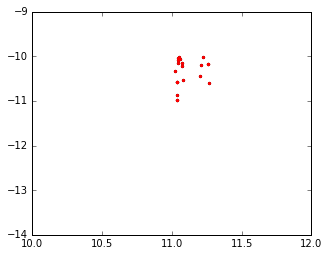

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
Hubble_h = .673

one_one_size_small=[5,4]
xlim=[10.0,12.0]
ylim=[-14.0,-9.0]

fig, ax = plt.subplots(figsize=(one_one_size_small[0],one_one_size_small[1]))
ax.set_xlim(xlim); ax.set_ylim(ylim)

df = pd.read_csv('/net/bootes/export/data1/data/study_for_andrea.csv')
df = df[df['galaxyId'].isin(int_GalID)]
print(len(df))

x_rand=np.random.randn(len(df['stellarMass']))
          
#log_mass=np.log10(df['mass'])+ x_rand *0.04*(1+df['redshift'])
#log_SFR=np.log10(df['Sfr'])+ x_rand *0.04*(1+df['redshift'])
log_mass=np.log10(df['stellarMass']*1.e10/Hubble_h)
log_SFR=np.log10(df['sfr'])
log_SSFR = log_SFR - log_mass

log_SSFR[log_SSFR<-13.5] = -13.5

sel=(log_mass>11.0) & (log_SSFR<-10)

plt.scatter(log_mass, log_SSFR, s=5, color='black') 
plt.scatter(log_mass[sel], log_SSFR[sel], s=5, color='red') 

#print(df[sel])

plt.show()

In [70]:
#read tree
import numpy as np
import gc
from importlib import reload
import procedures
reload (procedures)
from procedures import *

FirstFile = 140
LastFile =  180

from LGalaxies_tree_Henriques2015a_struct import LGalaxiesStruct
from LGalaxies_tree_Henriques2015a_struct import PropertiesToRead  

DirName_MR = '/net/bootes/scratch2/SAM/Henriques2015a/GalTree/MR/'  
    
(G_MR) = read_tree(DirName_MR,FirstFile,LastFile,PropertiesToRead,LGalaxiesStruct)
SnapshotList = np.zeros(len(FullRedshiftList),dtype=np.int32)
      
for ii in range(0,len(FullRedshiftList)):                  
    G0=G_MR[ np.rint(G_MR['Redshift']*100.) == FullRedshiftList[ii]*100. ]             
    SnapshotList[ii]=G0['SnapNum'][0]
      
G_MR = G_MR[(G_MR['SnapNum']<=58)]
gc.collect()

print('\nreading done')



Reading Headers

TotNgals= [77003904]


File  140  nGals =  2680311
File  141  nGals =  1698025
File  142  nGals =  2206874
File  143  nGals =  1457508
File  144  nGals =  2124282
File  145  nGals =  1828515
File  146  nGals =  1353979
File  147  nGals =  1876152
File  148  nGals =  2158623
File  149  nGals =  1930292
File  150  nGals =  1752276
File  151  nGals =  2204714
File  152  nGals =  2014799
File  153  nGals =  2157096
File  154  nGals =  2087566
File  155  nGals =  2103096
File  156  nGals =  1603877
File  157  nGals =  2289769
File  158  nGals =  1206145
File  159  nGals =  1154132
File  160  nGals =  2203403
File  161  nGals =  1715382
File  162  nGals =  2336596
File  163  nGals =  2167618
File  164  nGals =  2010720
File  165  nGals =  2130065
File  166  nGals =  1732953
File  167  nGals =  1630609
File  168  nGals =  2794979
File  169  nGals =  1725016
File  170  nGals =  1628265
File  171  nGals =  1967798
File  172  nGals =  2259190
File  173  nGals =  1614747
File  

In [83]:
from matplotlib.backends.backend_pdf import PdfPages
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd

with PdfPages('./plots.pdf') as pdf:  
    
    fig = plt.figure(figsize=(15,15))
    grid = gridspec.GridSpec(3, 3)
    #grid.update(wspace=0.3, hspace=0.0)

    xlim=[2.0,10.0]
    
    ylim=[-12.0,-7.0]
    subplot1=plt.subplot(grid[0])
    subplot1.set_ylim(ylim), subplot1.set_xlim(xlim) 
        
    ylim=[9.0,11.5]
    subplot2=plt.subplot(grid[1])    
    subplot2.set_ylim(ylim), subplot2.set_xlim(xlim)  
       
    ylim=[5.5,8.5]    
    subplot3=plt.subplot(grid[2])    
    subplot3.set_ylim(ylim), subplot3.set_xlim(xlim)  
        
    ylim=[10.5,14.]
    subplot4=plt.subplot(grid[3])
    subplot4.set_ylim(ylim), subplot4.set_xlim(xlim)  
     
    ylim=[8.5,12.0]
    subplot5=plt.subplot(grid[4])
    subplot5.set_ylim(ylim), subplot5.set_xlim(xlim)  
    
    #ylim=[-3.0,3.0]
    ylim=[1.0,3.5]
    subplot6=plt.subplot(grid[5])
    subplot6.set_ylim(ylim), subplot6.set_xlim(xlim)  
    
    ylim=[9.0,13.0]
    subplot7=plt.subplot(grid[6])
    subplot7.set_ylim(ylim), subplot7.set_xlim(xlim) 
    
    #ylim=[-7.0,-5.0]
    ylim=[-7.0,-4.0]
    subplot8=plt.subplot(grid[7])
    subplot8.set_ylim(ylim), subplot8.set_xlim(xlim)
    
    ylim=[-3.0,0.1]
    subplot9=plt.subplot(grid[8])
    subplot9.set_ylim(ylim), subplot9.set_xlim(xlim)
    
    #format axis
    #majorFormatter = FormatStrFormatter('%d')
    #subplot1.xaxis.set_major_locator(MultipleLocator(1))    
    #subplot1.xaxis.set_minor_locator(MultipleLocator(0.25))
           
    xlab='$z$'   
    ylab='$\log_{10}(\mathrm{SSFR})$'    
    subplot1.set_xlabel(xlab, fontsize=14), subplot1.set_ylabel(ylab, fontsize=14)
    ylab='$\log_{10}(M_{*})$' 
    subplot2.set_xlabel(xlab, fontsize=14), subplot2.set_ylabel(ylab, fontsize=14)
    ylab='$\log_{10}(M_{\mathrm{BH}})$' 
    subplot3.set_xlabel(xlab, fontsize=14), subplot3.set_ylabel(ylab, fontsize=14)
    ylab='$\log_{10}(M_{\mathrm{200c}})$' 
    subplot4.set_xlabel(xlab, fontsize=14), subplot4.set_ylabel(ylab, fontsize=14)    
    ylab='$\log_{10}(M_{\mathrm{Cold}})$' 
    subplot5.set_xlabel(xlab, fontsize=14), subplot5.set_ylabel(ylab, fontsize=14)
    ylab='$\log_{10}(\mathrm{Cooling rate})$' 
    subplot6.set_xlabel(xlab, fontsize=14), subplot6.set_ylabel(ylab, fontsize=14)
    ylab='$\log_{10}(M_{\mathrm{Hot}})$' 
    subplot7.set_xlabel(xlab, fontsize=14), subplot7.set_ylabel(ylab, fontsize=14)
    ylab='$\log_{10}(\mathrm{rate ratio})$' 
    subplot8.set_xlabel(xlab, fontsize=14), subplot8.set_ylabel(ylab, fontsize=14)
    ylab='$Bulge Fraction$' 
    subplot9.set_xlabel(xlab, fontsize=14), subplot9.set_ylabel(ylab, fontsize=14)
            
    z0_snap=25        
    N_z=15  
    
    #STAR FORMING
    G0_MR=G_MR[G_MR['SnapNum']==z0_snap]  
    G0_MR=G0_MR[(G0_MR['StellarMass']*1.e10/Hubble_h>10.**(11.0))  &                
                (G0_MR['Type']==0)]
    #G0_MR=G0_MR[(G0_MR['StellarMass']*1.e10/Hubble_h>1.e10) & (G0_MR['StellarMass']*1.e10/Hubble_h<1.e11) & 
    #            ((G0_MR['Sfr']/(G0_MR['StellarMass']*1.e10/Hubble_h))>1.e-11) & (G0_MR['BlackHoleMass']>0.) &
    #            (G0_MR['Type']==0)]
    np.random.seed(1)
    G0_MR=np.random.choice(G0_MR, size=30)
        
    z0_IDs=G0_MR['GalID']
    Ngals=len(z0_IDs)
   
    log_SSFR_array=np.zeros(N_z,dtype=np.float32)
    log_StellarMass_array=np.zeros(N_z,dtype=np.float32)
    log_BHMass_array=np.zeros(N_z,dtype=np.float32)    
    log_Mvir_array=np.zeros(N_z,dtype=np.float32)
    log_ColdGas_array=np.zeros(N_z,dtype=np.float32)
    log_CoolingRate_array=np.zeros(N_z,dtype=np.float32)
    log_HotGas_array=np.zeros(N_z,dtype=np.float32)
    log_RateRatio_array=np.zeros(N_z,dtype=np.float32)
    log_BulgeFract_array=np.zeros(N_z,dtype=np.float32)
    redshift=np.zeros(N_z,dtype=np.float32)
        
    #cmap = plt.get_cmap('rainbow')
    cmap = plt.get_cmap('winter')
    colors = [cmap(i) for i in np.linspace(0, 1, Ngals)]
   
    for ii in range (0, Ngals): 
        print(ii)
    #for ii in range (0, 1):       
        Gal_allz=G_MR[(G_MR['GalID']>=G0_MR[ii]['GalID']) & (G_MR['GalID']<=G0_MR[ii]['MainLeafId'])]       
        kk=0
        min_snap=np.amin(Gal_allz['SnapNum'])       
        if min_snap<(z0_snap-N_z)+1:
            min_snap=(z0_snap-N_z)+1
        #print(min_snap)    
        #for jj in range (z0_snap-N_z+1,z0_snap+1):       
        for jj in range (min_snap,z0_snap+1):     
            sel=(Gal_allz['SnapNum']==jj)    
            if(len(Gal_allz[sel]['Sfr'])>0.):
                log_SSFR_array[kk]=np.log10(Gal_allz[sel]['Sfr']/(Gal_allz[sel]['StellarMass']*1.e10/Hubble_h))
                log_StellarMass_array[kk]=np.log10(Gal_allz[sel]['StellarMass']*1.e10/Hubble_h)
                log_BHMass_array[kk]=np.log10(Gal_allz[sel]['BlackHoleMass']*1.e10/Hubble_h)               
                log_Mvir_array[kk]=np.log10(Gal_allz[sel]['Mvir']*1.e10/Hubble_h)
                log_ColdGas_array[kk]=np.log10(Gal_allz[sel]['ColdGas']*1.e10/Hubble_h)
                log_CoolingRate_array[kk]=np.log10(Gal_allz[sel]['CoolingRate'])
                ##log_CoolingRate_array[kk]=np.log10(Gal_allz[sel]['CoolingGas']*1.e10/Hubble_h)
                log_HotGas_array[kk]=np.log10(Gal_allz[sel]['HotGas']*1.e10/Hubble_h)
                log_RateRatio_array[kk]=np.log10(Gal_allz[sel]['RadioAccretionRate']/Gal_allz[sel]['CoolingRate_beforeAGN'])
                log_BulgeFract_array[kk]=np.log10(Gal_allz[sel]['BulgeMass']/Gal_allz[sel]['StellarMass'])
                                
                redshift[kk]=Gal_allz[sel]['Redshift']
                kk+=1
                 
        #print(redshift)
       
        #subplot.scatter(redshift, log_SSFR_array, s=5, color='black')   
        sel=redshift>0.
        subplot1.plot(redshift[sel], log_SSFR_array[sel],color=colors[ii], linewidth=2)
        subplot2.plot(redshift[sel], log_StellarMass_array[sel],color=colors[ii], linewidth=2)
        subplot3.plot(redshift[sel], log_BHMass_array[sel],color=colors[ii], linewidth=2)       
        subplot4.plot(redshift[sel], log_Mvir_array[sel],color=colors[ii], linewidth=2)
        subplot5.plot(redshift[sel], log_ColdGas_array[sel],color=colors[ii], linewidth=2)
        subplot6.plot(redshift[sel], log_CoolingRate_array[sel],color=colors[ii], linewidth=2)
        subplot7.plot(redshift[sel], log_HotGas_array[sel],color=colors[ii], linewidth=2)
        subplot8.plot(redshift[sel], log_RateRatio_array[sel],color=colors[ii], linewidth=2)
        subplot9.plot(redshift[sel], log_BulgeFract_array[sel],color=colors[ii], linewidth=2)
       
            
            
    df = pd.read_csv('/net/bootes/export/data1/data/study_for_andrea.csv')
    df2 = df[df['galaxyId'].isin(int_GalID)].copy() 
    
    ii=0
    for idx, row in df2.iterrows():
        #print(ii)
        df3 = df[(df['galaxyId']>=row['galaxyId']) & (df['galaxyId']<=row['mainLeafId'])]      
        #df3 = df[df['galaxyId']==row['galaxyId']+2]      
        log_SSFR_array=np.log10(df3['sfr']/(df3['stellarMass']*1.e10/Hubble_h))
        log_StellarMass_array=np.log10(df3['stellarMass']*1.e10/Hubble_h)
        log_BHMass_array=np.log10(df3['blackHoleMass']*1.e10/Hubble_h)               
        log_Mvir_array=np.log10(df3['mvir']*1.e10/Hubble_h)
        log_ColdGas_array=np.log10(df3['coldGas']*1.e10/Hubble_h)
        log_CoolingRate_array=np.log10(df3['coolingRate'])                
        log_HotGas_array=np.log10(df3['hotGas']*1.e10/Hubble_h)
        log_RateRatio_array=np.log10(df3['radioAccretionRate']/df3['coolingRateNoAGN'])
        log_BulgeFract_array=np.log10(df3['bulgeMass']/df3['stellarMass'])
        
        subplot1.plot(df3['redshift'], log_SSFR_array,color='black', linewidth=2)
        subplot2.plot(df3['redshift'], log_StellarMass_array,color='black', linewidth=2)
        subplot3.plot(df3['redshift'], log_BHMass_array,color='black', linewidth=2)       
        subplot4.plot(df3['redshift'], log_Mvir_array,color='black', linewidth=2)
        subplot5.plot(df3['redshift'], log_ColdGas_array,color='black', linewidth=2)
        subplot6.plot(df3['redshift'], log_CoolingRate_array,color='black', linewidth=2)
        subplot7.plot(df3['redshift'], log_HotGas_array,color='black', linewidth=2)
        subplot8.plot(df3['redshift'], log_RateRatio_array,color='black', linewidth=2)
        subplot9.plot(df3['redshift'], log_BulgeFract_array,color='black', linewidth=2)
        
        
        #print(df3['galaxyId'])
        ii+=1
        
    plt.tight_layout()
    plt.savefig('./plots.pdf')
    pdf.savefig()
    plt.close()
    
print('plots done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
plots done


In [81]:
#baryon conversion efficiency

from matplotlib.backends.backend_pdf import PdfPages
from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd


with PdfPages('./plots.pdf') as pdf:  
    
    fig, ax = plt.subplots(figsize=(one_one_size_small[0],one_one_size_small[1]))
   
    xlim=[2.0,10.0]
    ylim=[-3.5,-1.5]    
    ax.set_ylim(ylim), ax.set_xlim(xlim)            
    xlab='$z$'   
    ylab='$\log_{10}(M_*/M_{\mathrm{vir}})$'    
    ax.set_xlabel(xlab, fontsize=14), ax.set_ylabel(ylab, fontsize=14)
   
    z0_snap=25        
    N_z=15  
    
    #STAR FORMING
    G0_MR=G_MR[G_MR['SnapNum']==z0_snap]  
    G0_MR=G0_MR[(G0_MR['StellarMass']*1.e10/Hubble_h>10.**(11.0))  &                
                (G0_MR['Type']==0)]  
    np.random.seed(1)
    G0_MR=np.random.choice(G0_MR, size=30)
        
    z0_IDs=G0_MR['GalID']
    Ngals=len(z0_IDs)   
   
    log_StellarMass_array=np.zeros(N_z,dtype=np.float32)   
    log_Mvir_array=np.zeros(N_z,dtype=np.float32)
   
        
    #cmap = plt.get_cmap('rainbow')
    cmap = plt.get_cmap('winter')
    colors = [cmap(i) for i in np.linspace(0, 1, Ngals)]
   
    #all galaxies
    for ii in range (0, Ngals):    
        print(ii+1, Ngals)
        Gal_allz=G_MR[(G_MR['GalID']>=G0_MR[ii]['GalID']) & (G_MR['GalID']<=G0_MR[ii]['MainLeafId'])]       
        kk=0
        min_snap=np.amin(Gal_allz['SnapNum'])       
        if min_snap<(z0_snap-N_z)+1:
            min_snap=(z0_snap-N_z)+1
      
        for jj in range (min_snap,z0_snap+1):             
            sel=(Gal_allz['SnapNum']==jj)    
            if(len(Gal_allz[sel]['StellarMass'])>0.):               
                log_StellarMass_array[kk]=np.log10(Gal_allz[sel]['StellarMass']*1.e10/Hubble_h)               
                log_Mvir_array[kk]=np.log10(Gal_allz[sel]['Mvir']*1.e10/Hubble_h)          
                redshift[kk]=Gal_allz[sel]['Redshift']
                kk+=1
           
        sel=redshift>0.        
        ax.plot(redshift[sel], log_StellarMass_array[sel]-log_Mvir_array[sel],color=colors[ii], linewidth=2)
        
            
    #quenched galaxies        
    df = pd.read_csv('/net/bootes/export/data1/data/study_for_andrea.csv')
    df2 = df[df['galaxyId'].isin(int_GalID)].copy() 
    
    for idx, row in df2.iterrows():        
        df3 = df[(df['galaxyId']>=row['galaxyId']) & (df['galaxyId']<=row['mainLeafId'])]              
        log_StellarMass_array=np.log10(df3['stellarMass']*1.e10/Hubble_h)        
        log_Mvir_array=np.log10(df3['mvir']*1.e10/Hubble_h)       
        ax.plot(df3['redshift'], log_StellarMass_array-log_Mvir_array,color='black', linewidth=2)        
               
    plt.tight_layout()
    plt.savefig('./plots_SMHM.pdf')
    pdf.savefig()
    plt.close()
    
print('plots done')

1 30
2 30
3 30
4 30
5 30
6 30
7 30
8 30
9 30
10 30
11 30
12 30
13 30
14 30
15 30
16 30
17 30
18 30
19 30
20 30
21 30
22 30
23 30
24 30
25 30
26 30
27 30
28 30
29 30
30 30
plots done
